## Importing Dependencies


In [94]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix,classification_report

## Dataset Loading and Preprocessing

In [46]:
df = pd.read_csv("/Users/indusha-22955/Documents/Learning/IMDB_Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### Data Preprocessing

In [144]:
#Casefolding
def lowercase_convert(text):
    return text.lower()

#Stopwords removal
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    data_specific_set = {"film","films","character","movie","story","show","characters","movies","showed", "seen",
                      "seem","scene","movies","see","s","one","make","made","story","even","look","shows","plot","shown"}
    stop_words = stop_words.union(set(data_specific_set))
    return ' '.join([word for word in text.split() if word not in stop_words])

#Removing Special characters and punctuations, whitespaces, URL
def clean_text(text):
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    text =  re.sub(r"\s+"," ",text).strip()
    #text = re.sub(r'\s+', ' ', text).strip() 
    text = re.sub(r"/http/S+","",text)
    text = re.sub(r"\bbr\b","",text)
    return text

#Lemmatization
def lemmatize(text):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


In [ ]:
df["review_preprocessed"] = df["review"].apply(lowercase_convert).apply(remove_stopwords).apply(clean_text).apply(lemmatize)
df["review_preprocessed"] = df["review_preprocessed"].apply(remove_stopwords)
df["review_preprocessed"] = df["review_preprocessed"].apply(clean_text)
df["review_preprocessed"] = df["review_preprocessed"].apply(lemmatize)

In [ ]:
df["review"] = df["review_preprocessed"]
df.drop(columns="review_preprocessed", inplace=True)

In [53]:
df.head()

,review,sentiment
0,reviewer mentioned watching 1 oz episode hooke...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


In [9]:
remove_stopwords("i likes the way movies are shown s film these days")

'likes way days'

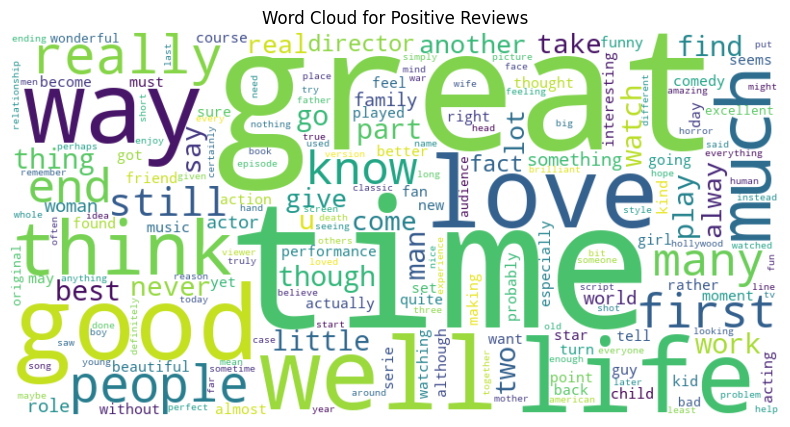

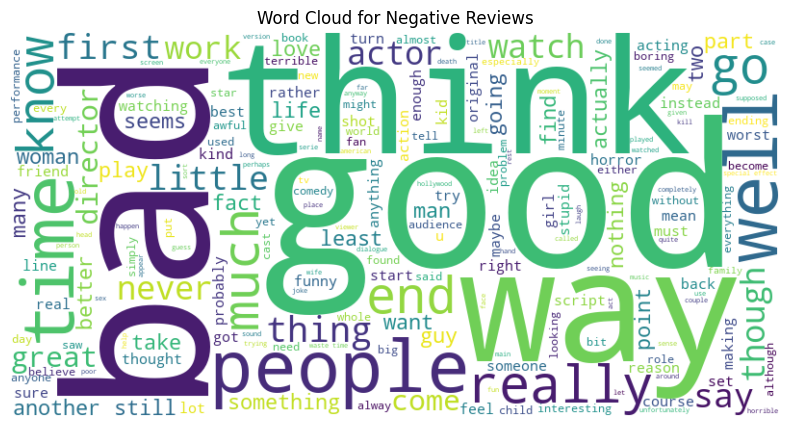

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to plot word frequency as a word cloud
def plot_word_cloud(corpus, title):
    # Join all reviews into a single string
    text = ' '.join(corpus)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Word cloud for positive reviews
plot_word_cloud(df[df['sentiment'] == 'positive']['review_preprocessed'], 'Word Cloud for Positive Reviews')

# Word cloud for negative reviews
plot_word_cloud(df[df['sentiment'] == 'negative']['review_preprocessed'], 'Word Cloud for Negative Reviews')

In [113]:

def tokenize(text):
    return text.lower().split()

df["review"]=df["review"].apply(tokenize)



AttributeError: 'list' object has no attribute 'lower'

In [56]:
df.head()

,review,sentiment
0,"[reviewer, mentioned, watching, 1, oz, episode...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, family, little, boy, jake, think, ...",negative
4,"[petter, mattei, love, time, money, visually, ...",positive


In [57]:
#tf-idf computation

#tf=n# of terms a word occurs in doc/# of words in doc
# idf = total number of docs in corpus/no of documents containing the word 
import math
from collections import Counter


def compute_tf(doc):
    #print(doc)
    term_freq = Counter(doc)
    doc_len = len(doc)
    tf = {term: freq / doc_len for term, freq in term_freq.items()}
    return tf

def compute_idf(corpus):
    N = len(corpus)
    # print(corpus)
    print(N)
    df = Counter()
    for doc in corpus:
        unique_terms = set(list(doc))
        for term in unique_terms:
            df[term] += 1
    idf = {term: math.log(N / df[term]) for term in df}
    return idf

def compute_tfidf(corpus):
    tfidf = []
    idf = compute_idf(corpus)
    for doc in corpus:
        tf = compute_tf(list(doc))
        doc_tfidf = {term: tf.get(term, 0) * idf.get(term, 0) for term in doc}
        tfidf.append(doc_tfidf)
    return tfidf

# Tokenize reviews
corpus = df["review"]
# print(len(corpus))
# print(type(corpus))

# Compute TF-IDF for all reviews
tfidf = compute_tfidf(corpus)

# Display TF-IDF for first review
print(tfidf[0])


50000
{'reviewer': 0.025782437761596697, 'mentioned': 0.024828790447510542, 'watching': 0.02398165393063123, '1': 0.016847614025100776, 'oz': 0.21568007204470527, 'episode': 0.03777081657211657, 'hooked': 0.033233499767710714, 'right': 0.02753638853164934, 'exactly': 0.021131157947817572, 'happened': 0.021019655288495184, 'first': 0.017543139150765923, 'thing': 0.009033370749697725, 'struck': 0.06646699953542143, 'brutality': 0.037578327124727126, 'unflinching': 0.04704325528614737, 'violence': 0.086060421818055, 'set': 0.014157104903300459, 'word': 0.03491439523216725, 'go': 0.019080345175323758, 'trust': 0.028213615397101488, 'faint': 0.03933367761317778, 'hearted': 0.030519106778213914, 'timid': 0.04425845397135282, 'pull': 0.024685930421533477, 'punch': 0.0301465194745094, 'regard': 0.03050377722387911, 'drug': 0.023745453307739684, 'sex': 0.01917089934989486, 'hardcore': 0.03485777550122812, 'classic': 0.01697812477386022, 'use': 0.0175828156758257, 'called': 0.01878247571754867, 

In [29]:
labels = df["sentiment"].value_counts()
type(labels)
print(labels)
print(list(labels))

sentiment
positive    25000
negative    25000
Name: count, dtype: int64
[25000, 25000]


In [93]:
len(corpus)

50000

In [114]:
from collections import defaultdict

def train_naive_bayes_with_tfidf(corpus, labels, tfidf_values):
    
    pos_reviews = [corpus[i] for i in range(len(labels)) if labels[i] == 'positive']
    neg_reviews = [corpus[i] for i in range(len(labels)) if labels[i] == 'negative']
    
    
    pos_tfidf = [tfidf_values[i] for i in range(len(labels)) if labels[i] == 'positive']
    neg_tfidf = [tfidf_values[i] for i in range(len(labels)) if labels[i] == 'negative']

    total_reviews = len(labels)
    pos_prob = len(pos_reviews) / total_reviews
    neg_prob = len(neg_reviews) / total_reviews
    
    # Vocabulary
    all_terms = set(term for doc in corpus for term in doc)
    
    pos_word_likelihoods = defaultdict(float)
    neg_word_likelihoods = defaultdict(float)
    
    for i, doc in enumerate(pos_reviews):
        for word in doc:
            pos_word_likelihoods[word] += tfidf_values[i].get(word, 0)
    
    for i, doc in enumerate(neg_reviews):
        for word in doc:
            neg_word_likelihoods[word] += tfidf_values[i].get(word, 0)
    
    pos_total_tfidf = sum(sum(doc.values()) for doc in pos_tfidf)
    neg_total_tfidf = sum(sum(doc.values()) for doc in neg_tfidf)
    
    pos_word_likelihoods = {word: score / pos_total_tfidf for word, score in pos_word_likelihoods.items()}
    neg_word_likelihoods = {word: score / neg_total_tfidf for word, score in neg_word_likelihoods.items()}
    
    return pos_prob, neg_prob, pos_word_likelihoods, neg_word_likelihoods

def predict_sentiment_single(review, pos_prob, neg_prob, pos_likelihoods, neg_likelihoods, tfidf_values, should_tokenize=True):
    if should_tokenize==True:
        tokens = tokenize(review)
    else:
        tokens = review
    
    pos_log_prob = math.log(pos_prob)
    neg_log_prob = math.log(neg_prob)
    
    for word in tokens:
        pos_log_prob += math.log(pos_likelihoods.get(word, 1))  
        neg_log_prob += math.log(neg_likelihoods.get(word, 1))  
    
    # Return the class with the higher log-probability
    # print(pos_log_prob,neg_log_prob)
    return 'positive' if pos_log_prob > neg_log_prob else 'negative'

# Training Naive Bayes with TF-IDF features
labels = df["sentiment"]
pos_prob, neg_prob, pos_likelihoods, neg_likelihoods = train_naive_bayes_with_tfidf(corpus[:40000], labels[:40000], tfidf)

new_review = "astofotopedia askuleoe xaoijiodw"
prediction = predict_sentiment_single(new_review, pos_prob, neg_prob, pos_likelihoods, neg_likelihoods, tfidf)
print(f"Predicted sentiment: {prediction}")


Predicted sentiment: negative


In [ ]:
import math

def predict_sentiment_single(text, pos_prob, neg_prob, pos_likelihoods, neg_likelihoods, tfidf_values, should_tokenize=True):
    tokens = text.split() if should_tokenize else text
    pos_log_prob = math.log(pos_prob) 
    neg_log_prob = math.log(neg_prob)  
    
    smoothing_factor = 1e-6  
    
    for word in tokens:
        pos_prob_word = pos_likelihoods.get(word, smoothing_factor)
        neg_prob_word = neg_likelihoods.get(word, smoothing_factor)


        pos_log_prob += math.log(pos_prob_word+1e-6)  
        neg_log_prob += math.log(neg_prob_word+1e-6)  

    if pos_log_prob > neg_log_prob:
        return "positive"
    else:
        return "negative"


In [ ]:
#print(y_test)
y_pred = []
def predict_sentiment_with_tfidf(review, pos_prob, neg_prob, pos_likelihoods, neg_likelihoods, tfidf_values):
    y_pred = []
    #print(y_pred)
    for i in review:
        #print(i)
        y_pred.append(str(predict_sentiment_single(i, pos_prob, neg_prob, pos_likelihoods, neg_likelihoods, tfidf_values,should_tokenize=False)))
    return y_pred

y_test = labels[40000:]
y_pred = predict_sentiment_with_tfidf(corpus[40000:],pos_prob, neg_prob, pos_likelihoods, neg_likelihoods, tfidf)




In [143]:
print(classification_report(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test,y_pred)

print(cnf_matrix) #TN FP
                  #FN TP

              precision    recall  f1-score   support

    negative       0.77      0.84      0.80      4993
    positive       0.82      0.74      0.78      5007

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

[[4179  814]
 [1283 3724]]


In [ ]:
#okay let us try removing the top words preprocess and send it for prediction
def remove_stopwords_list(text):
    stop_words = set(stopwords.words('english'))
    data_specific_set = {"film","films","character","movie","story","show","characters","movies","showed", "seen",
                      "seem","scene","movies","see","s","one","make","made","story","even","look","shows","plot","shown"}
    stop_words = stop_words.union(set(data_specific_set))
    return [word for word in text if word not in stop_words]

def predict_sentiment_single(text, pos_prob, neg_prob, pos_likelihoods, neg_likelihoods, tfidf_values, should_tokenize=True):
    tokens = text.split() if should_tokenize else text
    text = remove_stopwords(text)
    pos_log_prob = math.log(pos_prob) 
    neg_log_prob = math.log(neg_prob)  
    
    smoothing_factor = 1e-6  
    
    for word in tokens:
        pos_prob_word = pos_likelihoods.get(word, smoothing_factor)
        neg_prob_word = neg_likelihoods.get(word, smoothing_factor)

        pos_log_prob += math.log(pos_prob_word+1e-6)  
        neg_log_prob += math.log(neg_prob_word+1e-6)  

    if pos_log_prob > neg_log_prob:
        return "positive"
    else:
        return "negative"

In [150]:
#print(y_test)
y_pred = []
def predict_sentiment_with_tfidf(review, pos_prob, neg_prob, pos_likelihoods, neg_likelihoods, tfidf_values):
    y_pred = []
    #print(y_pred)
    for i in review:
        #print(i)
        y_pred.append(str(predict_sentiment_single(i, pos_prob, neg_prob, pos_likelihoods, neg_likelihoods, tfidf_values,should_tokenize=False)))
    return y_pred

y_test = labels[40000:]
y_pred = predict_sentiment_with_tfidf(corpus[40000:],pos_prob, neg_prob, pos_likelihoods, neg_likelihoods, tfidf)




In [151]:
print(classification_report(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test,y_pred)

print(cnf_matrix) #TN FP
                  #FN TP


## uh-oh no improvement in accuracy

              precision    recall  f1-score   support

    negative       0.77      0.84      0.80      4993
    positive       0.82      0.74      0.78      5007

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

[[4179  814]
 [1283 3724]]


In [ ]:
# Predict sentiment for a new review
new_review = "wonderful film and stunning visuals"
prediction = predict_sentiment_with_tfidf(new_review, pos_prob, neg_prob, pos_likelihoods, neg_likelihoods, tfidf)
print(f"Predicted sentiment: {prediction}")

In [152]:
import 



# Save the model
def save_model(filename, pos_prob, neg_prob, pos_likelihoods, neg_likelihoods):
    model = {
        'pos_prob': pos_prob,
        'neg_prob': neg_prob,
        'pos_likelihoods': pos_likelihoods,
        'neg_likelihoods': neg_likelihoods
    }
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved successfully!")

# Save the model
save_model("naive_bayes_model_scratch.pkl", pos_prob, neg_prob, pos_likelihoods, neg_likelihoods)


Model saved successfully!


In [153]:


import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
stop_words = stopwords.words('english')

import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB



In [154]:
def one_hot(text):
    if text.lower()=="positive":
        return 1
    else:
        return 0 

In [155]:
df["sentiment"]=df["sentiment"].apply(one_hot)

In [156]:
df.head()

,review,sentiment
0,"[reviewer, mentioned, watching, 1, oz, episode...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, family, little, boy, jake, think, ...",0
4,"[petter, mattei, love, time, money, visually, ...",1


In [157]:
X= df['review']
y= df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 26)


In [158]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train) #applying tf idf to training data

tfidf_test_vectors = tfidf_vectorizer.transform(X_test) #applying tf idf to training data

AttributeError: 'list' object has no attribute 'lower'

In [159]:
print(tfidf_train_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3613209 stored elements and shape (40000, 68097)>
  Coords	Values
  (0, 36389)	0.46595643554568716
  (0, 57602)	0.05767700848194597
  (0, 47926)	0.07260444544530179
  (0, 34970)	0.06288967922406874
  (0, 30672)	0.055342448701104746
  (0, 56135)	0.08948330346508071
  (0, 34628)	0.08078321378804366
  (0, 29485)	0.099657008468987
  (0, 14507)	0.09799333663573014
  (0, 12551)	0.09669524412212668
  (0, 10177)	0.09435711027175511
  (0, 54977)	0.0985609617649871
  (0, 47611)	0.2935095237719767
  (0, 60218)	0.1447819066033061
  (0, 57695)	0.08588935299129469
  (0, 40049)	0.09733342565052877
  (0, 41267)	0.08855048643981195
  (0, 50165)	0.14299143334225808
  (0, 24207)	0.13866623899570094
  (0, 66228)	0.12160223446716253
  (0, 12211)	0.07080376300561214
  (0, 61282)	0.07910818466193272
  (0, 53816)	0.17661322807533752
  (0, 29773)	0.09487402125050859
  (0, 36300)	0.04789765430756285
  :	:
  (39999, 12640)	0.12014772306075389
  (39999

In [160]:

print("n_samples: %d, n_features: %d" % tfidf_train_vectors.shape)

n_samples: 40000, n_features: 68097




Each algorithm of NB expects different types of data.

    GaussianNB → When you have continuous features.
    CategoricalNB → When you have categorical data.
    MultinomialNB → Applied to text data.

So, given your data has continuous features, categorical features, and text data what algorithm you will use? The fundamental assumption of each and every algorithm is that it assumes the features are conditionally independent. Fit the categorical features on categoricalNB, continuous features on GaussianNB and text data on MultinomialNB and get the likelihood probabilities of each model(For each data point now we will have 3 likelihood probabilities) and multiply them to get the overall likelihood probability.

https://towardsdatascience.com/how-i-was-using-naive-bayes-incorrectly-till-now-part-1-4ed2a7e2212b/

In [161]:
naive_bayes_classifier = MultinomialNB()

naive_bayes_classifier.fit(tfidf_train_vectors, y_train)

MultinomialNB()

In [162]:

y_pred = naive_bayes_classifier.predict(tfidf_test_vectors)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      5067
           1       0.87      0.85      0.86      4933

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [163]:
cnf_matrix = confusion_matrix(y_test,y_pred)

print(cnf_matrix)

[[4419  648]
 [ 737 4196]]


<Axes: >

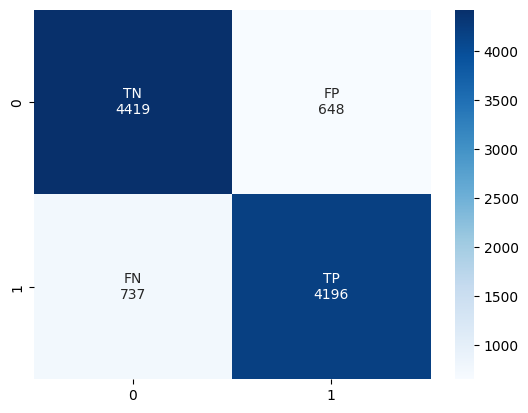

In [164]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [167]:
#trying to optimize



def convert_slang(text):
    converted_words = []

    for word in text:
        # Get synonyms for the current word
        synonyms = wordnet.synsets(word)
        
        # Use the first synonym as replacement (if available)
        replacement = synonyms[0].lemmas()[0].name() if synonyms else word
        converted_words.append(replacement)

    converted_text = " ".join(converted_words)
    return converted_text



In [168]:
df["review"]=df["review"].apply(convert_slang)

In [169]:
X= df['review']
y= df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 26)


In [170]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train) #applying tf idf to training data

tfidf_test_vectors = tfidf_vectorizer.transform(X_test) #applying tf idf to training data

In [171]:
naive_bayes_classifier = MultinomialNB()

naive_bayes_classifier.fit(tfidf_train_vectors, y_train)

MultinomialNB()

In [172]:

y_pred = naive_bayes_classifier.predict(tfidf_test_vectors)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      5067
           1       0.87      0.85      0.86      4933

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
#nope didn't improve the accuracy